In [1]:
from cumulant import csolve
from baths import OhmicBath,OverdampedBath
from qutip import Qobj,sigmaz,sigmax
# from qutip.solver.heom import DrudeLorentzPadeBath,HEOMSolver
import numpy as np

In [2]:
w0 = 1
Deltaw = 1e-2*w0
alpha = 0.05
gamma = 5*w0
T = 1*w0
tf = 4
t=np.linspace(0,tf,100)
Hsys = sigmaz()/2
Q = sigmax()

In [3]:
bath=OhmicBath(T,alpha,gamma)
bath2 = OverdampedBath(T,alpha,gamma)

In [4]:
cc = csolve(Hsys,t ,bath, Q)
cc2 = csolve(Hsys, t ,bath2, Q,eps=1e-6)

In [5]:
rho0=0.5*Qobj([[1,1],[1,1]])

In [6]:
result=cc.evolution(rho0)

Computing Exponential of Generators . . . .: 100%|██████████| 100/100 [00:00<00:00, 1474.05it/s]


In [7]:
result2 = cc2.evolution(rho0)

Calculating Integrals ...:   0%|          | 0/4 [00:00<?, ?it/s]

Computing Exponential of Generators . . . .: 100%|██████████| 100/100 [00:00<00:00, 1875.29it/s]


In [8]:
import matplotlib.pyplot as plt

In [9]:
def population(den, a, b):
    return [den[i][a, b] for i in range(len(den))]

In [10]:
# bath = DrudeLorentzPadeBath(Q=Q, lam=alpha*np.pi, gamma=gamma, T=T, Nk=8)
# solver = HEOMSolver(Hsys, bath, max_depth=5)
# result_h = solver.run(rho0, t)

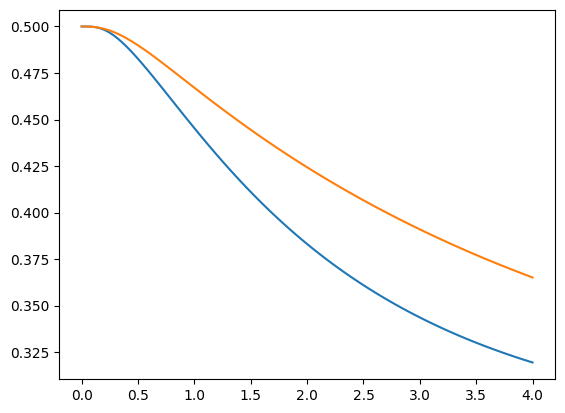

In [11]:
plt.plot(t,np.abs(population(result,0,0)))
plt.plot(t, np.abs(population(result2, 0, 0)))
# plt.plot(t, np.abs(population(result_h.states, 0, 1)))
# plt.show()

In [12]:
result[-1]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.31941399+0.j         0.18743279+0.02395468j]
 [0.18743279-0.02395468j 0.68058601+0.j        ]]

In [13]:
result2[-1]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.36508888+0.j         0.31662138+0.02325444j]
 [0.31662138-0.02325444j 0.63491112+0.j        ]]

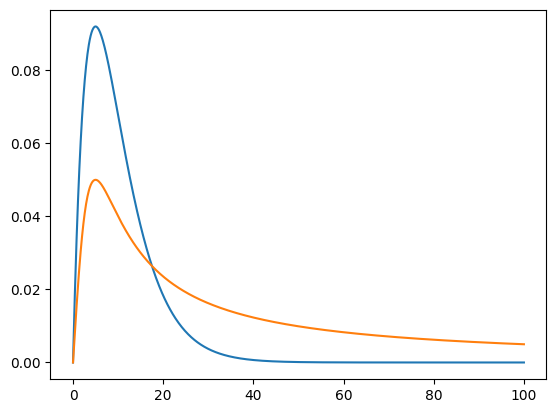

In [14]:
w=np.linspace(0,100,1000)
plt.plot(w,bath.spectral_density(w))
plt.plot(w,bath2.spectral_density(w))